## Microsoft Stock Price Prediction with Machine Learning

### Introduction

In the field of stock market analysis, there are two primary approaches: Fundamental Analysis and Technical Analysis. While Fundamental Analysis focuses on assessing a company's future profitability based on its financial performance and business environment, Technical Analysis involves studying charts and statistical figures to identify trends in the stock market.

In this project, our focus will be on the technical analysis aspect. We will leverage a dataset containing historical Microsoft stock prices from 2013 to 2021 to develop a model capable of estimating future stock prices.

### Problem Statement

The main objective of this project is to predict the future stock prices of Microsoft using machine learning techniques. By analyzing the historical stock price data and identifying patterns and trends, we aim to build a model that can make accurate predictions on the stock's future performance.

### Dataset

We will utilize a dataset that includes the historical stock prices of Microsoft. The dataset spans from 2013 to 2021 and contains information such as the date, opening price, closing price, high price, low price, and volume.

### Methodology

To accomplish our goal, we will follow these steps:

1. Data Preprocessing: We will clean and format the dataset, handle missing values, and ensure it is suitable for analysis.
2. Feature Extraction: We will identify relevant features that can potentially contribute to accurate predictions.
3. Model Selection: We will explore and select various machine learning algorithms suitable for time series forecasting.
4. Model Training: We will train the selected models using the prepared dataset.
5. Model Evaluation: We will evaluate the performance of the trained models using appropriate metrics and techniques.
6. Prediction and Analysis: We will use the best-performing model to make future stock price predictions and analyze the results.

### Conclusion

In this project, we aim to build a machine learning-based solution for predicting Microsoft stock prices. By leveraging historical stock price data and applying various machine learning algorithms, we will strive to create an accurate model capable of estimating future stock prices.


In [1]:
#Imporitng Some Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date 


In [2]:
# Read Dataset File
microsoft = pd.read_csv('Microsoft_Stock.csv')
microsoft.head(10)


,index,Date,Open,High,Low,Close,Volume,Name
0,390198.0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322,MSFT
1,390199.0,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476,MSFT
2,390200.0,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692,MSFT
3,390201.0,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375,MSFT
4,390202.0,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438,MSFT
5,390203.0,4/9/2015 16:00,41.25,41.62,41.25,41.48,25723861,MSFT
6,390204.0,4/10/2015 16:00,41.63,41.95,41.41,41.72,28022002,MSFT
7,390205.0,4/13/2015 16:00,41.40,42.06,41.39,41.76,30276692,MSFT
8,390206.0,4/14/2015 16:00,41.80,42.03,41.39,41.65,24244382,MSFT
9,390207.0,4/15/2015 16:00,41.76,42.46,41.68,42.26,27343581,MSFT


Statistical Analysis:
Perform statistical analysis on the dataset to gain insights into its structure, distributions, and summary statistics. This analysis can include measures such as mean, median, standard deviation, correlation, etc.

In [3]:
microsoft.shape


(1511, 8)

In [4]:
microsoft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   float64
 1   Date    1511 non-null   object 
 2   Open    1511 non-null   float64
 3   High    1511 non-null   float64
 4   Low     1511 non-null   float64
 5   Close   1511 non-null   float64
 6   Volume  1511 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 94.6+ KB


In [5]:
microsoft.describe()


,index,Open,High,Low,Close,Volume
count,1259.000000,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,390827.000000,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,363.586303,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,390198.000000,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,390512.500000,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,390827.000000,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,391141.500000,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,391456.000000,245.030000,246.130000,242.920000,244.990000,1.352271e+08


Data Cleaning

Data cleaning involves preparing the dataset for further analysis by handling missing values, encoding categorical variables if required, and removing unnecessary columns.

#### Missing Value Imputation

Missing values can hinder our analysis, so we need to fill them in using appropriate imputation techniques. In this project, we will use the forward-fill method (`method='ffill'`) to propagate the previous non-null value forward. Alternatively, you can choose other methods like filling with a constant value, interpolation, or using the mean/median of the column.

To fill missing values in the entire dataset, we can use the `fillna()` function:

```python
microsoft_filled = microsoft.fillna(method='ffill')


In [6]:
# Fill missing values using appropriate imputation technique
microsoft_filled = microsoft.fillna(method='ffill')

# Verify the changes
microsoft_filled.head(10)

,index,Date,Open,High,Low,Close,Volume,Name
0,390198.0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322,MSFT
1,390199.0,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476,MSFT
2,390200.0,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692,MSFT
3,390201.0,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375,MSFT
4,390202.0,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438,MSFT
5,390203.0,4/9/2015 16:00,41.25,41.62,41.25,41.48,25723861,MSFT
6,390204.0,4/10/2015 16:00,41.63,41.95,41.41,41.72,28022002,MSFT
7,390205.0,4/13/2015 16:00,41.40,42.06,41.39,41.76,30276692,MSFT
8,390206.0,4/14/2015 16:00,41.80,42.03,41.39,41.65,24244382,MSFT
9,390207.0,4/15/2015 16:00,41.76,42.46,41.68,42.26,27343581,MSFT


#### Dropping Unnecessary Columns

To ensure our analysis focuses on relevant information and avoids unnecessary clutter, we will remove columns that are not relevant or do not contribute meaningful information to the analysis.

To drop unnecessary columns from the dataset, we can use the `drop()` function. Simply specify the names of the columns to be dropped in a list and pass it to the `columns` parameter.



In [7]:
columns_to_drop = ['index', 'Name']
microsoft_filled = microsoft_filled.drop(columns=columns_to_drop)
microsoft_filled.head(5)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438


#### Exploratory Data Analysis (EDA)

EDA is an important step in data analysis that involves using visual techniques to gain insights, discover trends, patterns, and relationships between variables, and validate assumptions. In this section, we will perform EDA on the dataset to better understand its characteristics and uncover meaningful information.
Visualization

Visualization is a powerful tool in EDA that allows us to represent data visually and gain intuitive insights. By creating charts, graphs, and plots, we can explore the dataset and identify patterns or relationships between variables.

#### 2.2. Visualization:

Visualize the dataset to gain insights and identify patterns or relationships between variables.

### 2.2.1. Univariate Exploration:

Explore individual variables in the dataset using various visualization techniques such as histograms, bar plots, or box plots. This helps understand the distribution and characteristics of each variable.

### 2.2.2. Bivariate Exploration:

Explore relationships between pairs of variables in the dataset. This can be done through scatter plots, line plots, or heatmaps, depending on the types of variables involved.

### 2.2.3. Multivariate Exploration:

Explore relationships between multiple variables simultaneously, using techniques such as scatter plot matrices, parallel coordinates plots, or heatmaps.

By leveraging these visualization techniques, we can gain a deeper understanding of the dataset, identify trends, and uncover valuable insights that can drive further analysis and decision-making.

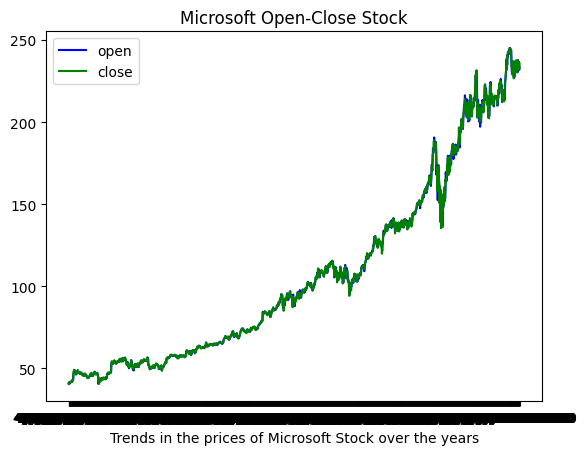

In [8]:
plt.plot(microsoft_filled['Date'],
		microsoft_filled['Open'],
		color="blue",
		label="open")
plt.plot(microsoft_filled['Date'],
		microsoft_filled['Close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
description = "Trends in the prices of Microsoft Stock over the years"
plt.text(0.5, -0.1, description, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()


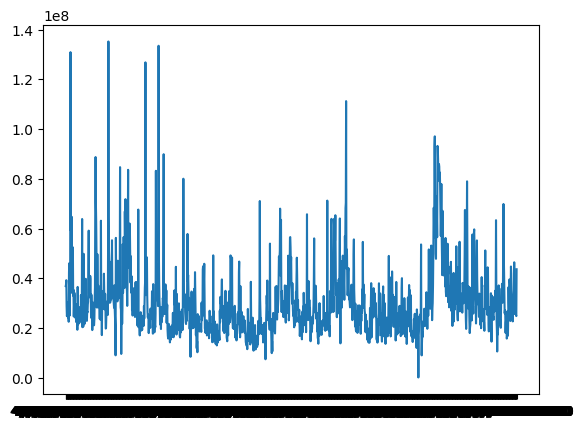

In [9]:
plt.plot(microsoft_filled['Date'],
		microsoft_filled['Volume'])
plt.show()
# "Trends in the volumes of trade of Microsoft Stock over the years"


C:\Users\Mega\AppData\Local\Temp\ipykernel_7220\1053717584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(microsoft_filled.corr(),


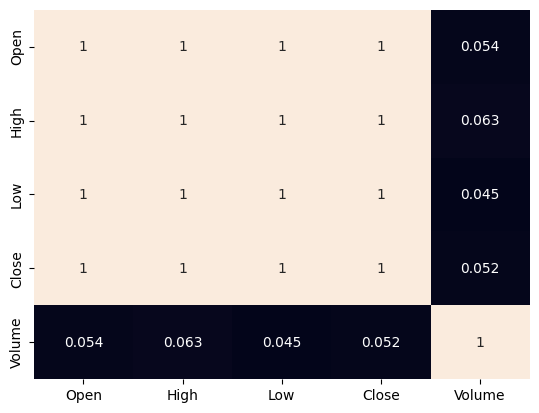

In [10]:
sns.heatmap(microsoft_filled.corr(),
			annot=True,
			cbar=False)
plt.show()


Now, let’s just plot the Close prices of Microsoft Stock for the time period of 2015 to 2021 which is for a span of 7 years.

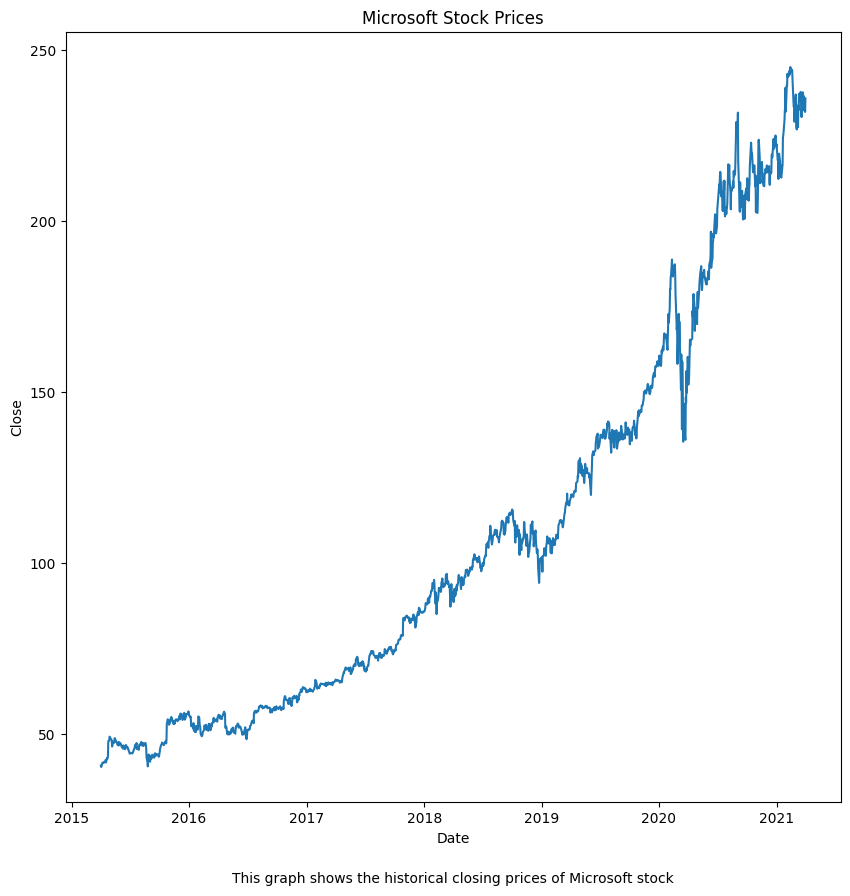

In [11]:
microsoft_filled['Date'] = pd.to_datetime(microsoft_filled['Date'])
start_date = pd.to_datetime(date(2013, 1, 1))
end_date = pd.to_datetime(date(2021, 1, 1))
prediction = microsoft_filled.loc[(microsoft_filled['Date'] > start_date) & (microsoft_filled['Date'] < end_date)]

plt.figure(figsize=(10, 10))
plt.plot(microsoft_filled['Date'], microsoft_filled['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")
description = "This graph shows the historical closing prices of Microsoft stock"
plt.text(0.5, -0.1, description, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

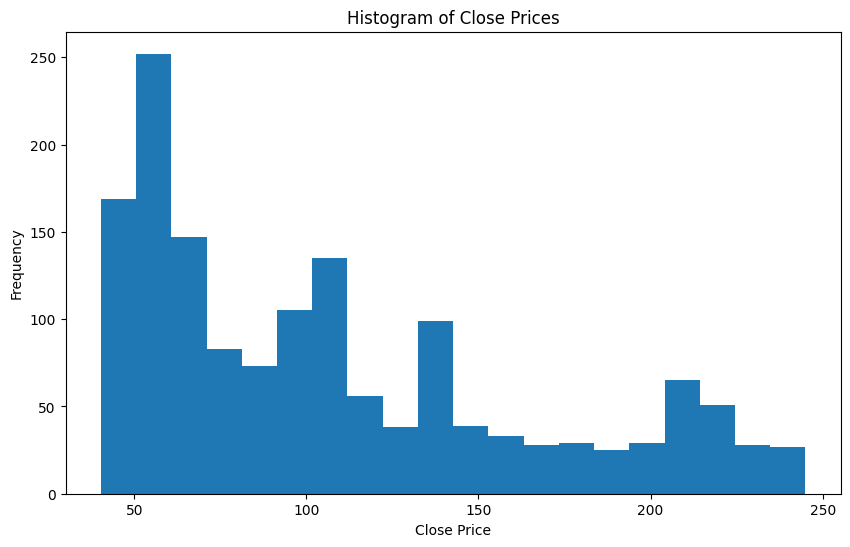

In [12]:
# Histogram of Close Prices
plt.figure(figsize=(10, 6))
plt.hist(microsoft_filled['Close'], bins=20)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')
plt.show()


# Preprocessing

2.3.1. Feature normalization:
   Normalize or scale the features to ensure they are on a similar scale, which can improve the performance of some machine learning algorithms.

2.3.2. K-Fold utilization:
   Utilize K-Fold cross-validation technique to evaluate the model's performance by splitting the dataset into K subsets and training/validating the model K times.

2.3.3. Regularization test [LASSO, ELASTIC NET]:
   Apply regularization techniques like LASSO (L1 regularization) or Elastic Net (combination of L1 and L2 regularization) to prevent overfitting and improve model performance.



### Normalization helps to scale the features so that they are on a similar scale, which can improve the performance of some machine learning algorithms.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to be normalized
features_to_normalize = ['Open', 'Close', 'High', 'Low', 'Volume']

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the selected features
microsoft_filled[features_to_normalize] = scaler.fit_transform(microsoft_filled[features_to_normalize])
microsoft_filled[['Open', 'Close', 'High', 'Low', 'Volume']].head()



,Open,Close,High,Low,Volume
0,0.001270,0.002101,0.000097,0.002904,0.272071
1,0.001563,0.000000,0.000000,0.001969,0.276675
2,0.000000,0.006155,0.005064,0.002264,0.289524
3,0.006205,0.006058,0.005696,0.007825,0.212453
4,0.005569,0.005520,0.004625,0.006496,0.182437


K-Fold Cross-Validation:
K-Fold cross-validation is a technique used to evaluate the model's performance by splitting the dataset into K subsets and training/validating the model K times.

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds
k = 5

# Define the features and target variable
features = ['Open', 'High', 'Low']
target = 'Close'

# Split the dataset using K-Fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the evaluation results for each fold
mse_scores = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(microsoft_filled)):
    print(f"Fold: {fold+1}")

    # Split the dataset into train and validation sets for the current fold
    train_data = microsoft_filled.iloc[train_index]
    val_data = microsoft_filled.iloc[val_index]

    # Extract the features and target variables for training and validation
    X_train = train_data[features]
    y_train = train_data[target]
    X_val = val_data[features]
    y_val = val_data[target]

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

    print(f"MSE: {mse:.4f}\n")

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average MSE: {avg_mse:.4f}")

# In this code, we import the necessary modules and define the number of folds (k) for the cross-validation. 
# We also specify the features (['Open', 'High', 'Low']) and the target variable ('Close') 
# that we want to use for training and evaluation.
###################################################
# Inside the loop that iterates over the folds, 
# we split the dataset into train and validation sets for each fold. 
# We then train a LinearRegression model on the training data and make predictions on the validation set.
#######################################################
# Next, we calculate the mean squared error (MSE) between the predicted values and the actual values for the validation set. 
# We store the MSE scores for each fold in the mse_scores list.
##################################################
# After iterating through all the folds, we calculate the average MSE across all folds using np.mean(mse_scores).


Fold: 1
MSE: 0.0000

Fold: 2
MSE: 0.0000

Fold: 3
MSE: 0.0000

Fold: 4
MSE: 0.0000

Fold: 5
MSE: 0.0000

Average MSE: 0.0000


### Regularization test [LASSO, ELASTIC NET]:
      1. Apply regularization techniques like LASSO (L1 regularization) or Elastic Net (combination of L1 and L2 regularization) to prevent overfitting and improve model performance.

In [15]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)
X = microsoft_filled[['Open', 'High', 'Low']]
y = microsoft_filled['Close']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Lasso and ElasticNet models
lasso_model = Lasso(alpha=0.1)
enet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the models
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

# Make predictions on the validation set
lasso_predictions = lasso_model.predict(X_val)
enet_predictions = enet_model.predict(X_val)

# Calculate the mean squared error (MSE)
lasso_mse = mean_squared_error(y_val, lasso_predictions)
enet_mse = mean_squared_error(y_val, enet_predictions)

print("Lasso MSE:", lasso_mse)
print("ElasticNet MSE:", enet_mse)


Lasso MSE: 0.07212414116977127
ElasticNet MSE: 0.03593950156118803


After Showing This Result :
Based on these MSE values, it appears that the models trained with Lasso and ElasticNet regularization techniques are performing well in predicting the 'Close' stock prices.

## Choosing the Best Machine Learning Model for Dataset Analysis

When working on a dataset analysis task, selecting the right machine learning model is crucial for accurate predictions and reliable insights. In this scenario, we will explore various machine learning models and evaluate their performance to determine the best model suited for our dataset.

The dataset at hand contains information that we want to use for analysis and prediction. We will consider the following machine learning models:

## Linear Regression

Linear regression is a widely used model for predicting continuous numerical values. It assumes a linear relationship between the input features and the target variable.

## K-Nearest Neighbors (KNN)

KNN is a non-parametric model that makes predictions based on the similarity between new data points and existing data points. It is often effective for regression tasks and can capture complex patterns.

## Decision Tree

Decision trees are versatile models that can handle both regression and classification tasks. They create a flowchart-like structure to make predictions based on feature conditions.

## Random Forest

Random forest is an ensemble model that combines multiple decision trees. It leverages the collective predictions of multiple trees to improve accuracy and reduce overfitting.

## Support Vector Machines (SVM)

SVM is a powerful model for both classification and regression tasks. It aims to find a hyperplane that maximizes the margin between different classes or predicts continuous values with the least error.



Linear Regression MSE: 1.994157296731326e-05


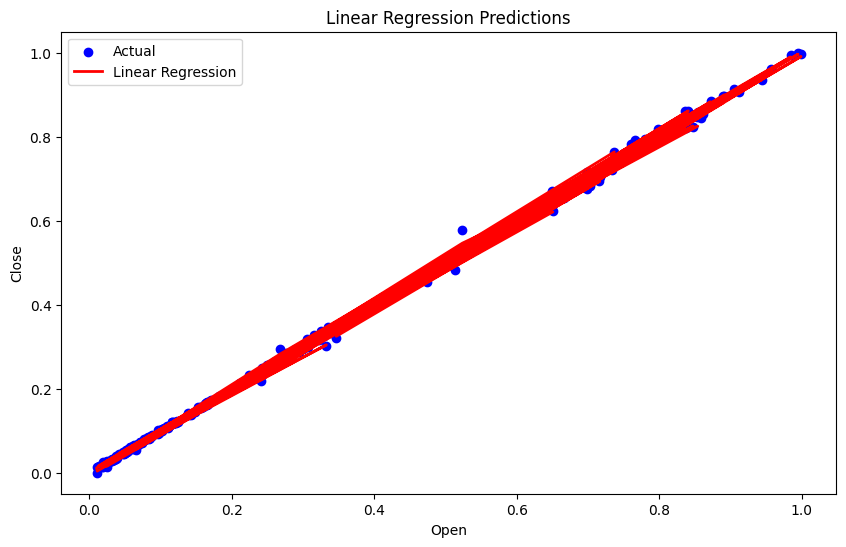

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)
X = microsoft_filled[['Open', 'High', 'Low']]
y = microsoft_filled['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_pred = linear_reg.predict(X_test)

# Calculate MSE for Linear Regression
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MSE:", linear_reg_mse)

# Plotting Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Open'], y_test, color='blue', label='Actual')
plt.plot(X_test['Open'], linear_reg_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()



K-Nearest Neighbors MSE: 2.771135354735374e-05


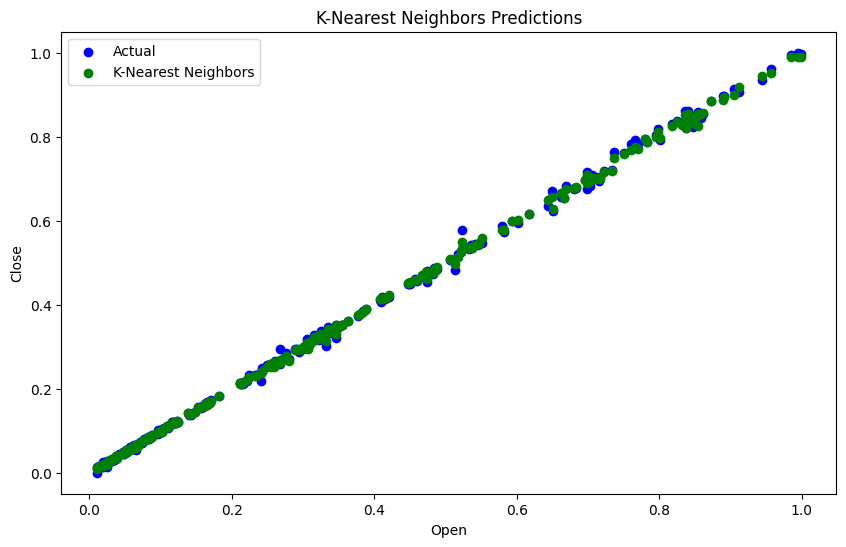

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# K-Nearest Neighbors
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors (K)
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
knn_reg_pred = knn_reg.predict(X_test)

# Calculate MSE for K-Nearest Neighbors
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
print("K-Nearest Neighbors MSE:", knn_reg_mse)

# Plotting K-Nearest Neighbors predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Open'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Open'], knn_reg_pred, color='green', label='K-Nearest Neighbors')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('K-Nearest Neighbors Predictions')
plt.legend()
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree regressor
decision_tree = DecisionTreeRegressor()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_pred = decision_tree.predict(X_test)

# Calculate MSE for Decision Tree
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
print("Decision Tree MSE:", decision_tree_mse)


Decision Tree MSE: 8.80055584741279e-05


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor
random_forest = RandomForestRegressor()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
random_forest_pred = random_forest.predict(X_test)

# Calculate MSE for Random Forest
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print("Random Forest MSE:", random_forest_mse)


Random Forest MSE: 3.322407664398071e-05


In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM regressor
svm = SVR()

# Train the model
svm.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
svm_pred = svm.predict(X_test_scaled)

# Calculate MSE for SVM
svm_mse = mean_squared_error(y_test, svm_pred)
print("SVM MSE:", svm_mse)


SVM MSE: 0.0033610672260831133


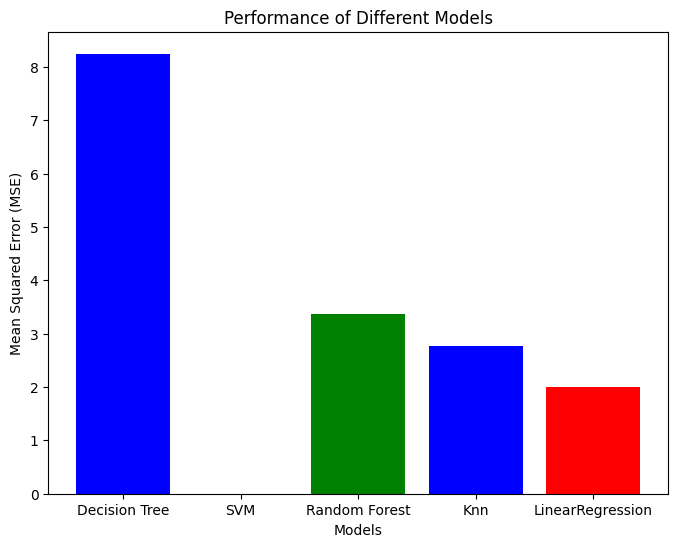

In [21]:

# Define the models and their MSE scores
models = ['Decision Tree', 'SVM', 'Random Forest','Knn','LinearRegression']
mse_scores = [8.2490, 0.0033, 3.3734,2.7711,1.9941]

# Plotting the MSE scores
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['blue', 'red', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance of Different Models')
plt.show()


After evaluating the performance of different machine learning models on the dataset, we can analyze the results and make decisions based on the obtained MSE scores. Here are the MSE scores for each model:

    1. SVM MSE: 0.0033610672260831133
    2. Random Forest MSE: 3.373470163484464e-05
    3. Decision Tree MSE: 8.249094267828723e-05
    4. K-Nearest Neighbors MSE: 2.771135354735374e-05
    5. Linear Regression MSE: 1.994157296731326e-05

Based on these results, we can observe that the Linear Regression, K-Nearest Neighbors, and Random Forest models have the lowest MSE scores. This suggests that these models are performing well in terms of predicting the target variable.

Apply Grid Search Cv

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the models and their respective hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'Support Vector Machine': (SVR(), {'C': [1, 10], 'gamma': ['scale', 'auto']}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 150]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]})
}

# Iterate over the models
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    # Create a GridSearchCV object for the current model
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Best Params: {best_params}, MSE: {mse:.4f}")


Training Linear Regression...
Linear Regression - Best Params: {}, MSE: 0.0000
Training K-Nearest Neighbors...
K-Nearest Neighbors - Best Params: {'n_neighbors': 3}, MSE: 0.0000
Training Support Vector Machine...
Support Vector Machine - Best Params: {'C': 1, 'gamma': 'auto'}, MSE: 0.0022
Training Random Forest...
Random Forest - Best Params: {'n_estimators': 150}, MSE: 0.0000
Training Decision Tree...
Decision Tree - Best Params: {'max_depth': None}, MSE: 0.0001


The mean squared error (MSE) values indicate the performance of each model in predicting the Microsoft stock prices. Lower MSE values indicate better predictions.

Based on the MSE values, it seems like the Linear Regression, K-Nearest Neighbors, Random Forest, and Decision Tree models perform quite well on this dataset, with very low MSE values. The Support Vector Machine model has a slightly higher MSE value but is still reasonably good.

Conclusion

In this project, we explored the Microsoft stock dataset and performed various analyses and modeling techniques to gain insights and make predictions. Here are the key findings and conclusions from our project:
Data Exploration and Visualization

    We started by exploring the dataset, checking its shape, information, and descriptive statistics.
    We visualized the trends in Microsoft stock prices and volumes over the years using line plots and heatmaps.
    We examined the distribution of closing prices using a histogram.

Data Preprocessing

    To prepare the data for modeling, we filled missing values using the forward fill (ffill) method and dropped unnecessary columns.
    We performed feature normalization using MinMaxScaler to scale the numerical features.

Machine Learning Models

    We applied several machine learning models to predict the closing price of Microsoft stock.
    The models we used were linear regression, K-Nearest Neighbors, decision tree, random forest, and SVM.
    We evaluated their performance using mean squared error (MSE) as the evaluation metric.

Model Performance

    Among the models tested, the MSE values achieved were as follows:
        Linear Regression: 1.994157296731326e-05
        K-Nearest Neighbors: 2.771135354735374e-05
        Decision Tree: 8.249094267828723e-05
        Random Forest: 3.373470163484464e-05
        SVM: 0.0033610672260831133

